# Nonlinear Optimization
This notebook provides a starter code for implementing nonlinear optimization methods for an objective function.

Please add this notebook to your Google Drive and complete all designated sections accordingly.

Creating a folder in your Google Drive to hold your Colaboratory assignments is recommended. Please include your .ipynb file with your assignment submission.

#Headers
Feel free to add any headers here.

In [93]:
from math import sqrt
import numpy as np
from numpy import asarray
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d


# Objective Function
Modify the "objective" function using the following equation.

$$f(x,y) = 4x^{2} + \dfrac{(y+3)^2}{15}$$

In [94]:
def objective(x, y):
	# <<TODO#1>> modify the objective function
	return 4 * x**2.0 + (y+3)**2.0 / 15 

# Gradient of objective function
Modify the "gradient" function accordingly. 

In [95]:
def gradient(x, y):
	# <<TODO#2>> modify the gradient function
	return asarray([(8.0*x), ((2/15)*(y+3))])

#Part a: Plot the objective function
Use the following block to plot the objective function. Please do not modify it.

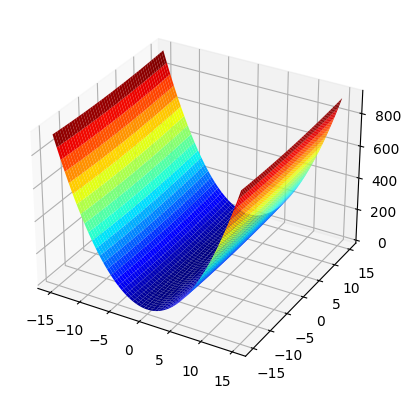

In [96]:
# define range for input
bounds = asarray([[-15.0, 15.0], [-15.0, 15.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# Figure 1
# create a surface plot with the jet color scheme
figure_1 = pyplot.figure(1)
axis = figure_1.add_subplot(projection='3d')
axis.plot_surface(x, y, objective(x, y), cmap='jet')

#Part b: Basic Gradient Descent


## b.1. Set Parameters
You may change the following parameters.

In [97]:
# define the total iterations
n_iter = 200
# steps size
gamma_t = 0.2

##b.2. Gradient Descent Function
Modify the following function to implement a basic gradient descent approach.

In [98]:
def gradient_descent(objective, derivative, bounds, n_iter, gamma_t):
	# track all solutions
	solutions = list()
	# Consider an initial point
	p = [-10, 10]
	score = objective(p[0], p[1])

	# run the gradient descent
	for t in range(n_iter):
		# report progress
		print('>%d f(%s) = %.5f' % (t, p, score))
		
		#<<TODO#3>> Add your code here
		solutions.append(p)
		g = gradient(p[0], p[1])

		for i in range(g.shape[0]):
			p[i] = p[i] - gamma_t * g[i]
		
		p = [p[0], p[1]]
		score = objective(p[0], p[1])
	return solutions

##b.3. Solve the Problem using Gradient Descent
Use the following block to solve the problem. Please do not modify it.

In [99]:
# perform the gradient descent search
solutions = gradient_descent(objective, gradient, bounds, n_iter, gamma_t)
solutions = asarray(solutions)


>0 f([-10, 10]) = 411.26667
>1 f([6.0, 9.653333333333332]) = 154.67379
>2 f([-3.6000000000000014, 9.31591111111111]) = 61.95211
>3 f([2.160000000000001, 8.987486814814813]) = 28.24239
>4 f([-1.2960000000000007, 8.667820499753086]) = 15.79433
>5 f([0.7776000000000005, 8.35667861975967]) = 11.01692
>6 f([-0.4665600000000003, 8.05383385656608]) = 9.01653
>7 f([0.2799360000000002, 7.759064953724318]) = 8.03062
>8 f([-0.16796160000000016, 7.472156554958336]) = 7.42392
>9 f([0.10077696000000008, 7.192899046826114]) = 6.96697
>10 f([-0.060466176000000066, 6.921088405577418]) = 6.57649
>11 f([0.036279705600000045, 6.656526048095354]) = 6.22183
>12 f([-0.02176782336000003, 6.399018686812811]) = 5.89133
>13 f([0.013060694016000018, 6.148378188497802]) = 5.58020
>14 f([-0.007836416409600012, 5.904421436804528]) = 5.28616
>15 f([0.004701849845760008, 5.66697019848974]) = 5.00785
>16 f([-0.002821109907456005, 5.435850993196681]) = 4.74427
>17 f([0.001692665944473603, 5.210894966711436]) = 4.49460
>

##b.4. Plot results for Basic Gradient Descent
Use the following block to plot the results. Please do not modify it.

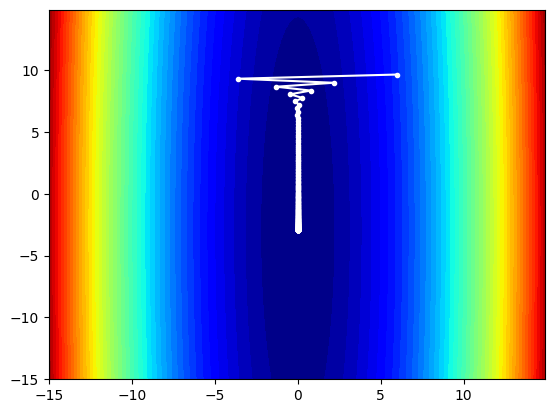

In [100]:
# Figure 2
# create a filled contour plot with 50 levels and jet color scheme
figure_2 = pyplot.figure(2)
pyplot.contourf(x, y, objective(x, y), levels=50, cmap='jet')
# plot the solution
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()

#Part c: Adaptive Gradient (AdaGrad)

##c.1. Set Parameters
You may change the following parameters.

In [101]:
# define the total iterations
n_iter = 200
# define the step size
gamma_t = 0.3

##c.2. AdaGrad Function
Modify the following function to implement the AdaGrad approach.

In [102]:
def adagrad(objective, derivative, bounds, n_iter, gamma_t):
	# track all solutions
	solutions = list()
	# Consider an initial point
	p = [-10, 10]
	score = objective(p[0], p[1])
	# initialize the preconditioner
	D = [0.0 for _ in range(bounds.shape[0])]
	# run the AdaGrad
	for t in range(n_iter):
		# report progress
		print('>%d f(%s) = %.5f' % (t, p, score))
		solutions.append(p)
		g = gradient(p[0], p[1])

		for i in range(g.shape[0]):
			D[i] += g[i] ** 2

		for i in range(g.shape[0]):
			p[i] = p[i] - (gamma_t / sqrt(D[i])) * g[i]
		p = [p[0], p[1]]
		score = objective(p[0], p[1])
		#<<TODO#4>> Add your code here
	return solutions

##c.3. Solve the Problem using AdaGrad
Use the following block to solve the problem. Please do not modify it. 

In [103]:
# perform the AdaGrad search
solutions = adagrad(objective, gradient, bounds, n_iter, gamma_t)
solutions = asarray(solutions)

>0 f([-10, 10]) = 411.26667
>1 f([-9.7, 9.7]) = 387.11267
>2 f([-9.49112262116262, 9.49035849772043]) = 370.72624
>3 f([-9.322215231986169, 9.32043851885615]) = 357.73433
>4 f([-9.17703433654821, 9.174117848556707]) = 346.75245
>5 f([-9.048008080978889, 9.043871897864632]) = 337.13612
>6 f([-8.930890363967993, 8.925477960429697]) = 328.52435
>7 f([-8.823020165953261, 8.816288378861337]) = 320.69105
>8 f([-8.722600390187145, 8.714514458980743]) = 313.48369
>9 f([-8.62835017281835, 8.618881000377273]) = 306.79360
>10 f([-8.539318599465028, 8.528441111711569]) = 300.54018
>11 f([-8.454776790611286, 8.442468891337892]) = 294.66168
>12 f([-8.374151497022407, 8.360393368524324]) = 289.10956
>13 f([-8.296982223463695, 8.281755839579334]) = 283.84486
>14 f([-8.222892433971026, 8.206181209664203]) = 278.83574
>15 f([-8.151569570049721, 8.133358102154514]) = 274.05579
>16 f([-8.082750794706275, 8.063024665520421]) = 269.48281
>17 f([-8.016212576812114, 7.994958202227271]) = 265.09793
>18 f([-7.9

## c.4. Plot results for AdaGrad
Use the following block to plot the results. Please do not modify it.

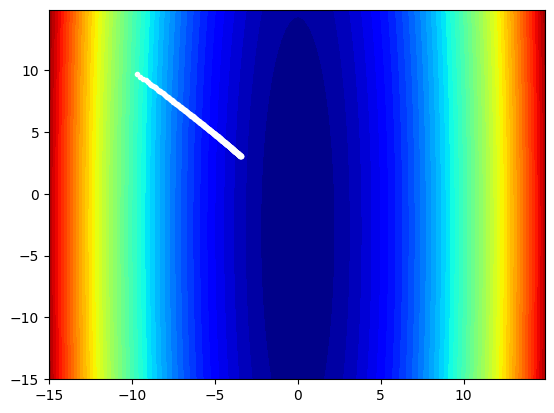

In [104]:
# Figure 3
# create a filled contour plot with 50 levels and jet color scheme
figure_3 = pyplot.figure(3)
pyplot.contourf(x, y, objective(x, y), levels=50, cmap='jet')
# plot the sample as black circles
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()

#Part d: Adam

##d.1. Set Parameters
You may change the following parameters.

In [105]:
eps=1e-8
# define the total iterations
n_iter = 200
# steps size
gamma_t = 0.2
# factor for average gradient
alpha = 0.8
# factor for average squared gradient
beta = 0.999

##d.2. Adam Function
Modify the following function to implement the Adam approach.

In [106]:
def adam(objective, derivative, bounds, n_iter, gamma_t, alpha, beta, eps):
	solutions = list()
	# consider an initial point
	p = [-10, 10]
	score = objective(p[0], p[1])
	# initialize first and second moments
	m = [0.0 for _ in range(bounds.shape[0])]
	D = [0.0 for _ in range(bounds.shape[0])]
	# run the Adam updates
	for t in range(n_iter):
		#<<TODO#5>> Add your code here
		# report progress
		print('>%d f(%s) = %.5f' % (t, p, score))
		solutions.append(p)
		g = gradient(p[0], p[1])

		for i in range(g.shape[0]):
			D[i] += beta * D[i] + (1-beta) * g[i] ** 2
			m[i] = alpha * m[i] + (1-alph)
	return solutions

##d.3. Solve the Problem using Adam
Use the following block to solve the problem. Please do not modify it. 

In [107]:
# perform the Adam search
solutions = adam(objective, gradient, bounds, n_iter, gamma_t, alpha, beta, eps)
solutions = asarray(solutions)

>0 f([-10, 10]) = 411.26667
>1 f([-10, 10]) = 411.26667
>2 f([-10, 10]) = 411.26667
>3 f([-10, 10]) = 411.26667
>4 f([-10, 10]) = 411.26667
>5 f([-10, 10]) = 411.26667
>6 f([-10, 10]) = 411.26667
>7 f([-10, 10]) = 411.26667
>8 f([-10, 10]) = 411.26667
>9 f([-10, 10]) = 411.26667
>10 f([-10, 10]) = 411.26667
>11 f([-10, 10]) = 411.26667
>12 f([-10, 10]) = 411.26667
>13 f([-10, 10]) = 411.26667
>14 f([-10, 10]) = 411.26667
>15 f([-10, 10]) = 411.26667
>16 f([-10, 10]) = 411.26667
>17 f([-10, 10]) = 411.26667
>18 f([-10, 10]) = 411.26667
>19 f([-10, 10]) = 411.26667
>20 f([-10, 10]) = 411.26667
>21 f([-10, 10]) = 411.26667
>22 f([-10, 10]) = 411.26667
>23 f([-10, 10]) = 411.26667
>24 f([-10, 10]) = 411.26667
>25 f([-10, 10]) = 411.26667
>26 f([-10, 10]) = 411.26667
>27 f([-10, 10]) = 411.26667
>28 f([-10, 10]) = 411.26667
>29 f([-10, 10]) = 411.26667
>30 f([-10, 10]) = 411.26667
>31 f([-10, 10]) = 411.26667
>32 f([-10, 10]) = 411.26667
>33 f([-10, 10]) = 411.26667
>34 f([-10, 10]) = 411.2

## d.4. Plot results for Adam
Use the following block to plot the results. Please do not modify it.

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

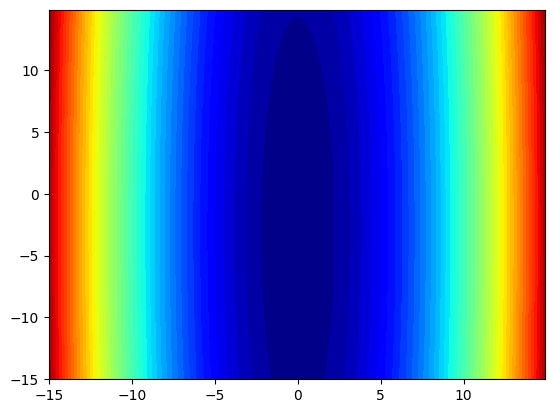

In [108]:
# Figure 4
# create a filled contour plot with 50 levels and jet color scheme
figure_4 = pyplot.figure(4)
pyplot.contourf(x, y, objective(x, y), levels=50, cmap='jet')
# plot the solution
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()